In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
sales_train = pd.read_csv('sales_train.csv')
item_cat = pd.read_csv('item_categories.csv')
items = pd.read_csv('items.csv')
shops = pd.read_csv('shops.csv')
sample_submission = pd.read_csv('sample_submission.csv')
test = pd.read_csv('test.csv')

In [4]:
# Data Audit

In [5]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
item_cat.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [7]:
sales_train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [8]:
sales_train.shape

(2935849, 6)

In [9]:
sales_train.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

In [10]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [11]:
sales_train.isna() .sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [12]:
sales_train.describe() .round()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2935849.0,2935849.0,2935849.0,2935849.0,2935849.0
mean,15.0,33.0,10197.0,891.0,1.0
std,9.0,16.0,6324.0,1730.0,3.0
min,0.0,0.0,0.0,-1.0,-22.0
25%,7.0,22.0,4476.0,249.0,1.0
50%,14.0,31.0,9343.0,399.0,1.0
75%,23.0,47.0,15684.0,999.0,1.0
max,33.0,59.0,22169.0,307980.0,2169.0


In [13]:
# Exploratory Data Analysis

In [14]:
sales_train["date"]= pd.to_datetime(sales_train["date"], format='%d.%m.%Y')
sales_train.sort_values(by="date", ascending=True, inplace=True)

In [15]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
49800,2013-01-01,0,18,5823,2500.0,1.0
29784,2013-01-01,0,27,5573,849.0,1.0
35476,2013-01-01,0,7,1006,399.0,1.0
8330,2013-01-01,0,19,17707,899.0,1.0
57384,2013-01-01,0,14,19548,149.0,1.0


In [16]:
sales_train['month_year'] = sales_train['date'].apply(lambda x: x.strftime('%Y-%m'))

In [17]:
sales_train_temp = sales_train.groupby('month_year').sum()['item_cnt_day'].reset_index()

In [18]:
# Sales per Item

In [19]:
sales_train['sales_item'] = sales_train['item_cnt_day'] * sales_train['item_price']

In [20]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month_year,sales_item
49800,2013-01-01,0,18,5823,2500.0,1.0,2013-01,2500.0
29784,2013-01-01,0,27,5573,849.0,1.0,2013-01,849.0
35476,2013-01-01,0,7,1006,399.0,1.0,2013-01,399.0
8330,2013-01-01,0,19,17707,899.0,1.0,2013-01,899.0
57384,2013-01-01,0,14,19548,149.0,1.0,2013-01,149.0


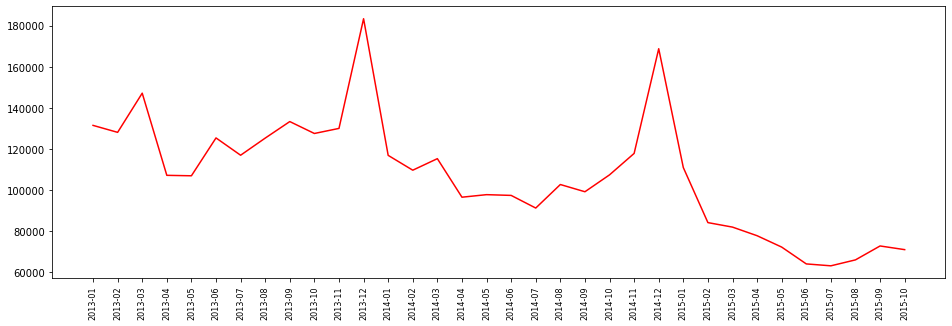

In [21]:
plt.figure(figsize=(16, 5))
plt.plot(sales_train_temp['month_year'], sales_train_temp['item_cnt_day'], color='#FF0000')
plt.xticks(rotation='vertical', size=8)
plt.show()

In [22]:
sales_train_temp = sales_train.groupby('month_year').sum()['sales_item'].reset_index()

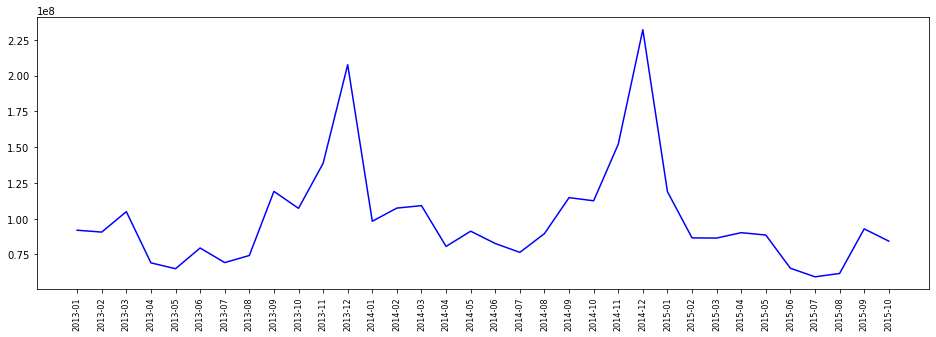

In [23]:
plt.figure(figsize=(16, 5))
plt.plot(sales_train_temp['month_year'], sales_train_temp['sales_item'], color='#0000FF')
plt.xticks(rotation='vertical', size=8)
plt.show()

<AxesSubplot:>

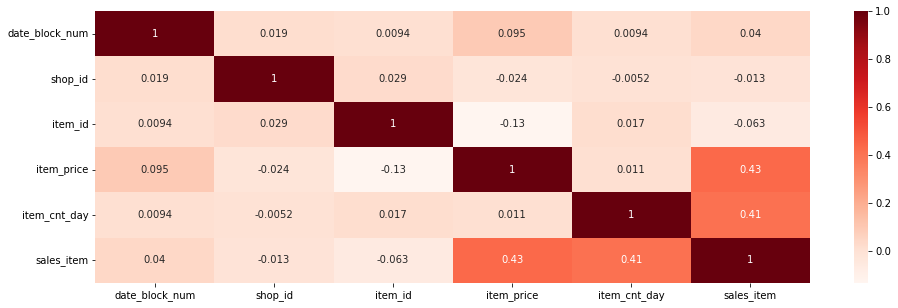

In [28]:
plt.figure(figsize=(16,5))
sns.heatmap(sales_train.corr(),annot=True,cmap='Reds')

In [ ]:
shope_sum_temp = sales_train.groupby('shop_id').sum()['item_cnt_day'].reset_index()

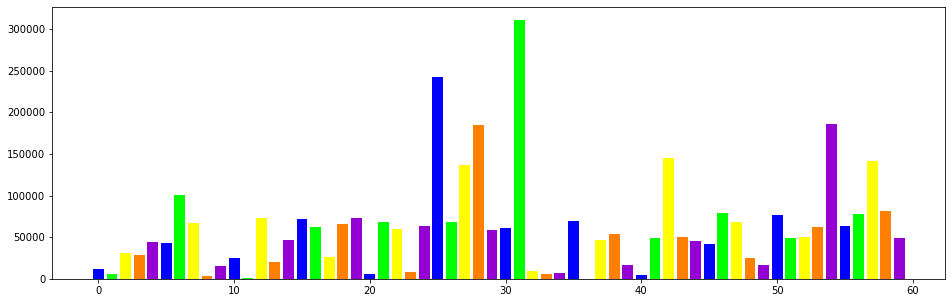

In [125]:
plt.figure(figsize=(16, 5))
plt.bar(shope_sum_temp['shop_id'], shope_sum_temp['item_cnt_day'], color=['#0000FF', '#00FF00', '#FFFF00', '#FF7F00', '#9400D3'])
plt.show()

In [162]:
cat_sum_temp = result.groupby('item_category_id').sum()['item_cnt_day'].reset_index()

In [127]:
top10shops = pd.DataFrame(sales_train.groupby('shop_id').sum()['item_cnt_day'])

In [129]:
top10shops.sort_values(by=['item_cnt_day'], inplace=True, ascending=False)

In [130]:
top10shops[:10]

,item_cnt_day
shop_id,
31,310777.0
25,241920.0
54,185790.0
28,184557.0
42,144934.0
57,141107.0
27,136657.0
6,100489.0
58,81734.0
